In [4]:
import numpy as np
import matplotlib.pyplot as plt

def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    """"smooth signal with Savitzky-Golay filter
    
    I think this fn came from chatgpt?
    """
    # Ensure window size is odd and greater than the polynomial order
    window_size = np.abs(int(window_size))
    order = np.abs(int(order))
    if window_size % 2 != 1 or window_size < 1:
        raise ValueError("window_size must be a positive odd number")
    if window_size < order + 2:
        raise ValueError("window_size is too small for the polynomial order")

    # Precompute coefficients
    half_window = (window_size - 1) // 2
    b = np.mat([[k**i for i in range(order + 1)] for k in range(-half_window, half_window + 1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * np.math.factorial(deriv)

    # Pad the signal at the extremes with values taken from the signal itself
    firstvals = y[0] - np.abs(y[1:half_window+1][::-1] - y[0])
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))

    return np.convolve(m[::-1], y, mode='valid')



C:\Users\Andrew\AppData\Local\Temp\ipykernel_17504\1351388567.py:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  m = np.linalg.pinv(b).A[deriv] * rate**deriv * np.math.factorial(deriv)


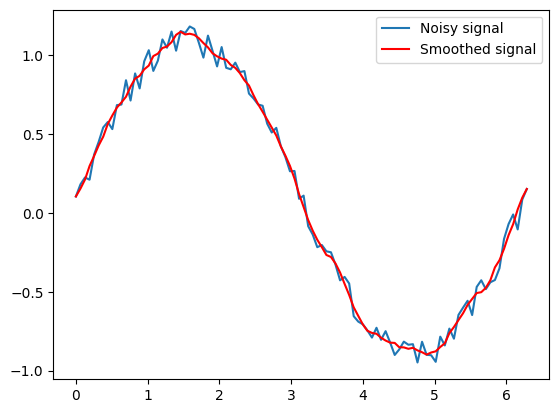

In [5]:
# Sample data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + np.random.random(100) * 0.2

# Apply Savitzky-Golay filter
window_size = 11  # length of the filter window (must be odd)
polyorder = 2     # order of the polynomial used to fit the samples
y_smooth = savitzky_golay(y, window_size, polyorder)

# Plot the results
plt.plot(x, y, label='Noisy signal')
plt.plot(x, y_smooth, label='Smoothed signal', color='red')
plt.legend()
plt.show()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_17504\1351388567.py:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  m = np.linalg.pinv(b).A[deriv] * rate**deriv * np.math.factorial(deriv)


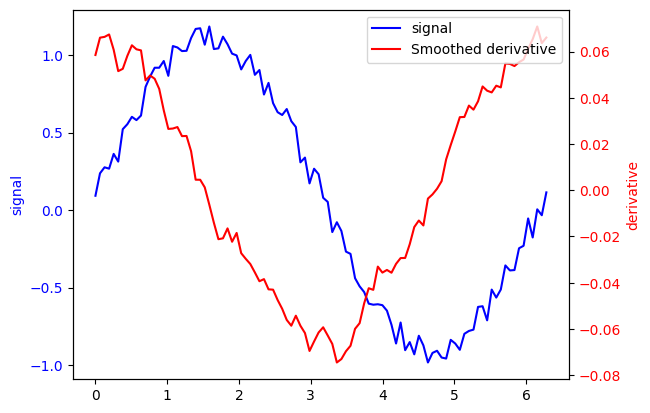

In [9]:
# Sample data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + np.random.random(100) * 0.2

# Apply Savitzky-Golay filter
window_size = 11  # length of the filter window (must be odd)
polyorder = 2     # order of the polynomial used to fit the samples
d1_smooth = savitzky_golay(y, window_size, polyorder, deriv=1)

# Create the plot
fig, ax1 = plt.subplots()

# Plot the first line
ax1.plot(x, y, label='signal', color='blue')
ax1.set_ylabel('signal', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(x, d1_smooth, label='Smoothed derivative', color='red')
ax2.set_ylabel('derivative', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

# # Plot the results
# plt.plot(x, y, label='Noisy signal')
# plt.plot(x, y_smooth, label='Smoothed signal', color='red')
# plt.legend()
# plt.show()

In [327]:
from scipy import signal
window_len = 13
polyorder=2
use='dot'
filter_d0 = signal.savgol_coeffs(
    window_length=window_len,
    polyorder=polyorder,
    deriv=0,
    pos=window_len-1,
    use=use
)
filter_d1 = signal.savgol_coeffs(
    window_length=window_len,
    polyorder=polyorder,
    deriv=1,
    pos=window_len-1,
    use=use
)

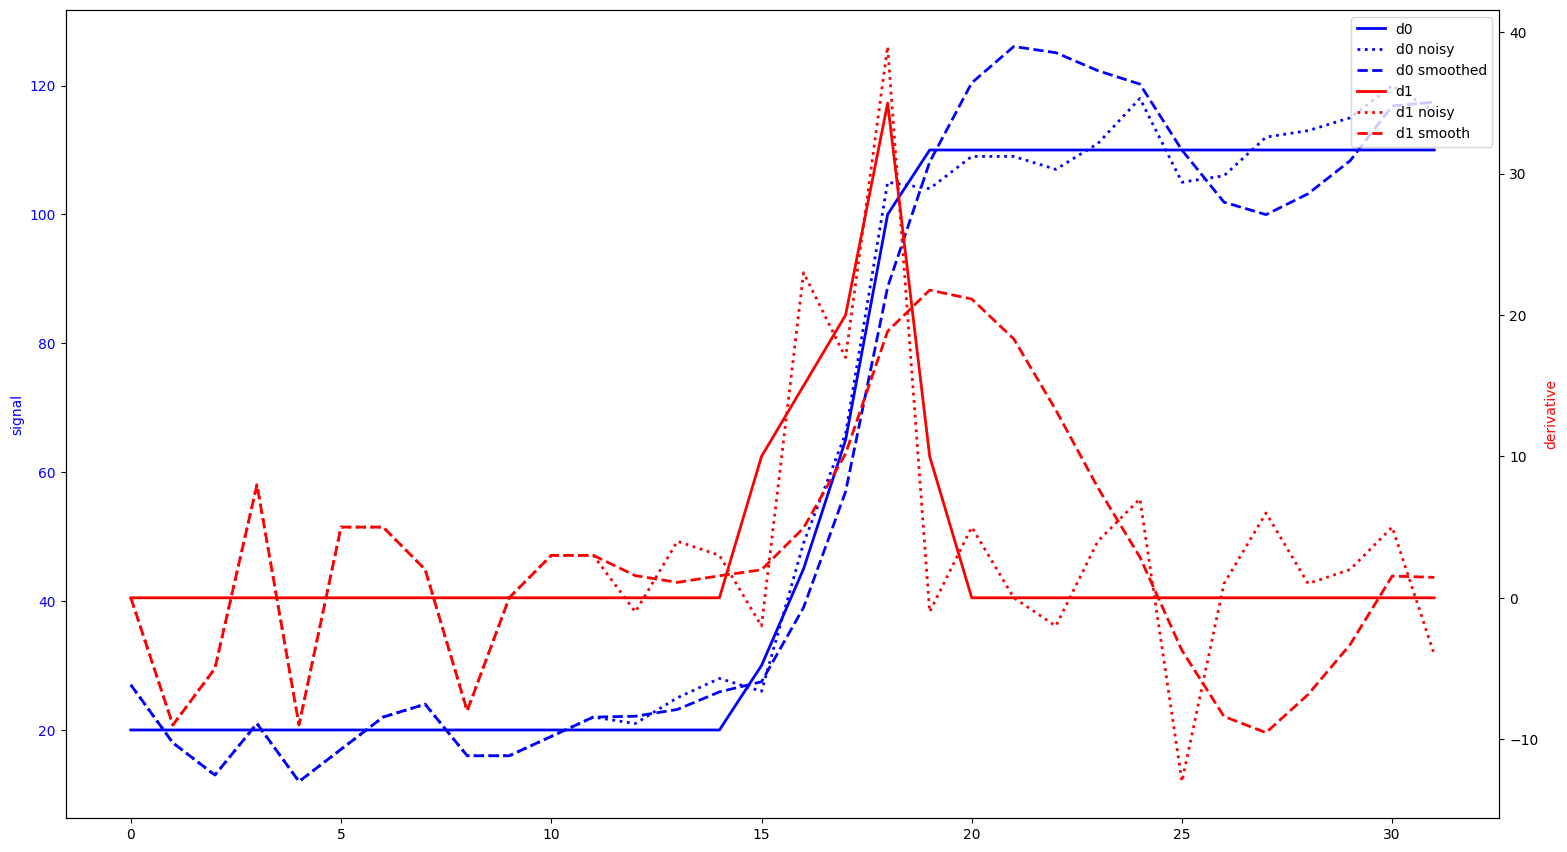

In [386]:
# x = np.linspace(0, 2 * np.pi, 100)
# y = np.sin(x) 
# y_noisy = y + np.random.random(100) * 0.2

y = np.array([20] * 15 + [30, 45, 65, 100, 110] + [110] * 12)
# y = np.array([20] * 15 + [23, 43, 63, 83, 103] + [110] * 12)
y_d1 = np.concatenate([[0], y[1:] - y[:-1]])
y_noisy = y + np.round(np.random.normal(0, 5, len(y)))
y_d1_noisy = np.concatenate([[0], y_noisy[1:] - y_noisy[:-1]])
x = [i for i in range(len(y))]

y_smooth = []
y_d1_smooth = []
for i in range(len(y_noisy)):
    if i < len(filter):
        y_smooth.append(y_noisy[i])
        y_d1_smooth.append(y_d1_noisy[i])
    else:
        y_smooth.append(np.dot(y_noisy[i-len(filter_d0)+1:i+1], filter_d0))
        y_d1_smooth.append(np.dot(y_noisy[i-len(filter_d1)+1:i+1], filter_d1))
        

# Sample data

# y_smooth = np.convolve(y, filter, mode='same')

# Create the plot
fig, ax1 = plt.subplots()
lw=2
# Plot the first line
ax1.plot(x, y, label='d0', color='blue', lw=lw)
ax1.plot(x, y_noisy, label='d0 noisy', color='blue',ls='dotted', lw=lw)
ax1.plot(x, y_smooth, label='d0 smoothed', color='blue', ls='--', lw=lw)
ax1.set_ylabel('signal', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(x, y_d1, label='d1', color='red', lw=lw)
ax2.plot(x, y_d1_noisy, label='d1 noisy', color='red', ls='dotted', lw=lw)
ax2.plot(x, y_d1_smooth, label='d1 smooth', color='red', ls='--', lw=lw)
ax2.set_ylabel('derivative', color='red')
ax2.tick_params(axis='y')#, labelcolor='red')

# Add legends
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
fig.set_size_inches(18.5, 10.5)
plt.show()

# # Plot the results
# plt.plot(x, y, label='Noisy signal')
# plt.plot(x, y_smooth, label='Smoothed signal', color='red')
# plt.legend()
# plt.show()